In [1]:
#Load libraries
import pandas as pd 
import matplotlib 

In [2]:
#Import data
raw_df = pd.read_csv("survey (1).csv")

In [3]:
#Print data
raw_df.head()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


In [4]:
#Build a function for group by 
group_by_country = raw_df.groupby(["Country", "treatment", "work_interfere"])["Timestamp"].count().reset_index()
print(group_by_country)

                    Country treatment work_interfere  Timestamp
0                 Australia        No          Never          3
1                 Australia        No      Sometimes          4
2                 Australia       Yes          Often          5
3                 Australia       Yes         Rarely          2
4                 Australia       Yes      Sometimes          6
5                   Austria        No      Sometimes          1
6              Bahamas, The       Yes          Often          1
7                   Belgium        No          Never          1
8                   Belgium        No          Often          1
9                   Belgium        No      Sometimes          1
10                  Belgium       Yes         Rarely          1
11   Bosnia and Herzegovina        No         Rarely          1
12                   Brazil        No          Never          1
13                   Brazil        No         Rarely          1
14                   Brazil        No   

In [5]:
#Show rows specifically for United states
country_df = raw_df[raw_df["Country"] == "United States"]
print(country_df)

                Timestamp  Age  Gender        Country state self_employed  \
0     2014-08-27 11:29:31   37  Female  United States    IL           NaN   
1     2014-08-27 11:29:37   44       M  United States    IN           NaN   
4     2014-08-27 11:30:22   31    Male  United States    TX           NaN   
5     2014-08-27 11:31:22   33    Male  United States    TN           NaN   
6     2014-08-27 11:31:50   35  Female  United States    MI           NaN   
8     2014-08-27 11:32:39   42  Female  United States    IL           NaN   
10    2014-08-27 11:32:44   31    Male  United States    OH           NaN   
12    2014-08-27 11:33:23   42  female  United States    CA           NaN   
13    2014-08-27 11:33:26   36    Male  United States    CT           NaN   
15    2014-08-27 11:34:00   29  female  United States    IL           NaN   
17    2014-08-27 11:34:37   32    Male  United States    TN           NaN   
18    2014-08-27 11:34:53   46    male  United States    MD           Yes   

In [6]:
#Build function for states of United States
states_df = country_df.groupby(["state", "treatment", "work_interfere"])["Timestamp"].count().reset_index()
print(states_df)

    state treatment work_interfere  Timestamp
0      AL        No          Never          1
1      AL       Yes          Often          1
2      AL       Yes      Sometimes          6
3      AZ       Yes          Often          1
4      AZ       Yes         Rarely          1
5      AZ       Yes      Sometimes          3
6      CA        No          Never         15
7      CA        No          Often          4
8      CA        No         Rarely          2
9      CA        No      Sometimes         10
10     CA       Yes          Never          5
11     CA       Yes          Often         15
12     CA       Yes         Rarely         17
13     CA       Yes      Sometimes         49
14     CO        No          Never          4
15     CO       Yes          Never          1
16     CO       Yes         Rarely          2
17     CO       Yes      Sometimes          1
18     CT        No          Never          1
19     CT       Yes          Often          1
20     CT       Yes         Rarely

In [7]:
#Sort the states dataframe by timestamp
timestamp_frequency_df = states_df.sort_values(["Timestamp"], ascending=False)
print(timestamp_frequency_df)

    state treatment work_interfere  Timestamp
13     CA       Yes      Sometimes         49
159    WA       Yes      Sometimes         26
12     CA       Yes         Rarely         17
6      CA        No          Never         15
11     CA       Yes          Often         15
101    NY       Yes      Sometimes         15
139    TX       Yes      Sometimes         15
106    OH       Yes      Sometimes         14
116    OR       Yes      Sometimes         11
40     IL       Yes      Sometimes         10
9      CA        No      Sometimes         10
133    TN       Yes      Sometimes          9
152    WA        No          Never          8
100    NY       Yes         Rarely          8
158    WA       Yes         Rarely          7
122    PA       Yes      Sometimes          7
95     NY        No          Never          7
47     IN       Yes      Sometimes          7
134    TX        No          Never          7
67     MI       Yes      Sometimes          7
128    TN        No          Never

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001AC4CF22588>]],
      dtype=object)

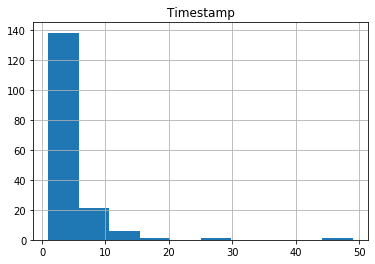

In [9]:
#Histogram by numbers of timestamp
timestamp_frequency_df.hist()